In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Loading the dataset from NYC Open Data (limit set to 200 000 rows)
url = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=200000"
df = pd.read_csv(url)

In [ ]:
#Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     200000 non-null  object 
 1   crash_time                     200000 non-null  object 
 2   borough                        131860 non-null  object 
 3   zip_code                       131836 non-null  float64
 4   latitude                       183491 non-null  float64
 5   longitude                      183491 non-null  float64
 6   location                       183491 non-null  object 
 7   on_street_name                 145735 non-null  object 
 8   off_street_name                93420 non-null   object 
 9   cross_street_name              54262 non-null   object 
 10  number_of_persons_injured      200000 non-null  int64  
 11  number_of_persons_killed       200000 non-null  int64  
 12  number_of_pedestrians_injured 

In [ ]:
#Displaying the shape of the dataset
df.shape

(200000, 29)

In [ ]:
#Displaying all the column names of the dataset
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'off_street_name',
       'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

# Cleaning Data And Missing Values Handling

In [ ]:
#Cleaning column names
df.columns = (
    df.columns
    .str.lower()               #Convert column names to lowercase
    .str.strip()               #Remove spaces at the beginning and end
    .str.replace(' ','_')      #Replace double underscores with single
    .str.replace('-','_')
)

In [ ]:
#Displaying column names after cleaning
for col in df.columns:
  print(col)

crash_date
crash_time
borough
zip_code
latitude
longitude
location
on_street_name
off_street_name
cross_street_name
number_of_persons_injured
number_of_persons_killed
number_of_pedestrians_injured
number_of_pedestrians_killed
number_of_cyclist_injured
number_of_cyclist_killed
number_of_motorist_injured
number_of_motorist_killed
contributing_factor_vehicle_1
contributing_factor_vehicle_2
contributing_factor_vehicle_3
contributing_factor_vehicle_4
contributing_factor_vehicle_5
collision_id
vehicle_type_code1
vehicle_type_code2
vehicle_type_code_3
vehicle_type_code_4
vehicle_type_code_5


In [ ]:
print(f"this dataset has {df.isnull().sum().sum()} missing values ")

this dataset has 1757025 missing values 


In [ ]:
#Displaying missing values by column
df.isnull().sum().sort_values(ascending=False)

,0
vehicle_type_code_5,198484
contributing_factor_vehicle_5,198419
vehicle_type_code_4,195022
contributing_factor_vehicle_4,194737
vehicle_type_code_3,181710
contributing_factor_vehicle_3,180305
cross_street_name,145750
off_street_name,106579
zip_code,68166
borough,68142


In [ ]:
#calculate percentage of missing values for each columns
print("percentage of missing values by columns")
#display only columns with missing values
missing_values_percentage = (df.isnull().sum()/len(df)) * 100
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]
#sort columns by percentage of missing values
missing_values_percentage = missing_values_percentage.sort_values(ascending= False)
print( missing_values_percentage)

percentage of missing values by columns
vehicle_type_code_5              99.2420
contributing_factor_vehicle_5    99.2095
vehicle_type_code_4              97.5110
contributing_factor_vehicle_4    97.3685
vehicle_type_code_3              90.8550
contributing_factor_vehicle_3    90.1525
cross_street_name                72.8750
off_street_name                  53.2895
zip_code                         34.0830
borough                          34.0710
vehicle_type_code2               33.3740
on_street_name                   27.1265
contributing_factor_vehicle_2    22.7705
location                          8.2550
longitude                         8.2550
latitude                          8.2550
vehicle_type_code1                1.2850
contributing_factor_vehicle_1     0.5345
dtype: float64


In [ ]:
#remove columns with null values percentage above 50%
df = df.loc[:, df.isnull().mean() < 0.5]

In [ ]:
print(f"the remaining columns are {df.shape[1]}")

the remaining columns are 21


In [ ]:
df.sample(10)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,number_of_persons_injured,number_of_persons_killed,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
122364,2022-03-10T00:00:00.000,21:30,BROOKLYN,11218.0,40.640915,-73.973650,"\n, \n(40.640915, -73.97365)",OCEAN PARKWAY,1,0,...,0,0,0,1,0,Reaction to Uninvolved Vehicle,Unspecified,4509191,Sedan,Sedan
79472,2021-08-16T00:00:00.000,11:30,NaN,NaN,40.792126,-73.971780,"\n, \n(40.792126, -73.97178)",AMSTERDAM AVENUE,0,0,...,0,0,0,0,0,Driverless/Runaway Vehicle,Unspecified,4447631,Van,Sedan
72663,2021-08-06T00:00:00.000,7:45,QUEENS,11385.0,40.704742,-73.902504,"\n, \n(40.704742, -73.902504)",NaN,0,0,...,0,0,0,0,0,NaN,NaN,4444825,NaN,NaN
186307,2023-02-11T00:00:00.000,1:30,BRONX,10469.0,40.862785,-73.844450,"\n, \n(40.862785, -73.84445)",MACE AVENUE,0,0,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4604656,Station Wagon/Sport Utility Vehicle,NaN
120439,2022-04-26T00:00:00.000,14:10,MANHATTAN,10014.0,40.733738,-73.999480,"\n, \n(40.733738, -73.99948)",NaN,1,0,...,0,0,0,0,0,Unspecified,Unspecified,4524402,E-Scooter,Sedan
67596,2022-01-22T00:00:00.000,19:36,QUEENS,11355.0,40.751453,-73.832280,"\n, \n(40.751453, -73.83228)",COLLEGE POINT BOULEVARD,0,0,...,0,0,0,0,0,Following Too Closely,Following Too Closely,4496490,Station Wagon/Sport Utility Vehicle,Sedan
127684,2022-03-20T00:00:00.000,15:00,NaN,NaN,40.738907,-73.847560,"\n, \n(40.738907, -73.84756)",LONG ISLAND EXPRESSWAY,3,0,...,0,0,0,3,0,Driver Inattention/Distraction,Following Too Closely,4511915,Sedan,Station Wagon/Sport Utility Vehicle
166145,2022-10-17T00:00:00.000,15:25,BRONX,10466.0,40.886395,-73.861250,"\n, \n(40.886395, -73.86125)",WHITE PLAINS ROAD,2,0,...,0,2,0,0,0,Failure to Yield Right-of-Way,Unspecified,4574599,Sedan,Bike
75885,2021-08-10T00:00:00.000,18:34,NaN,NaN,40.742660,-73.721080,"\n, \n(40.74266, -73.72108)",UNION TURNPIKE,1,0,...,0,0,0,0,0,Driver Inattention/Distraction,NaN,4445763,Sedan,NaN
107301,2021-11-29T00:00:00.000,6:07,QUEENS,11417.0,40.673850,-73.842310,"\n, \n(40.67385, -73.84231)",NaN,0,0,...,0,0,0,0,0,Steering Failure,Unspecified,4482025,Box Truck,Sedan


In [ ]:
#I notice that some rows have zip code  values but missing borough values
#I can extract the borough name  based on zip code
#I will use a mapping between zip code prefixes and borough names
# zip code and borough mapping
zip_borough_mapping ={
    '100': 'MANHATTAN',
    '101': 'MANHATTAN',
    '102': 'MANHATTAN',
    '103': 'STATEN ISLAND',
    '104': 'BRONX',
    '105': 'BRONX',
    '110': 'QUEENS',
    '111': 'QUEENS',
    '112': 'BROOKLYN',
    '113': 'QUEENS',
    '114': 'QUEENS',
    '116': 'QUEENS'
}

In [ ]:
#check the type of zip_code column and convert it to string
df['zip_code'] = df['zip_code'].astype(str)
# fill in only the missing borough values using the zip code mapping
df['borough'] = df.apply(
    lambda row: zip_borough_mapping.get(row['zip_code'][:3], row['borough'])
    if pd.isnull(row['borough'])
    else row['borough'],
    axis=1
)



In [ ]:
print(df['zip_code'].isnull().sum())

0


In [ ]:
#I notice that the 'zip code' column  contains "nan" as a string  value
print(df['zip_code'].unique())

['nan' '11230.0' '11208.0' '11233.0' '10475.0' '11207.0' '10017.0'
 '11413.0' '11434.0' '11217.0' '11226.0' '10463.0' '10001.0' '11372.0'
 '10301.0' '11215.0' '11211.0' '10455.0' '11385.0' '11418.0' '11225.0'
 '11220.0' '11411.0' '10452.0' '10466.0' '10453.0' '10019.0' '11221.0'
 '11203.0' '11419.0' '11101.0' '11106.0' '11223.0' '11422.0' '11213.0'
 '10128.0' '11218.0' '11692.0' '11420.0' '11205.0' '11212.0' '10022.0'
 '10011.0' '10314.0' '10461.0' '11004.0' '10025.0' '11373.0' '10018.0'
 '11234.0' '10462.0' '10472.0' '11206.0' '11236.0' '11210.0' '11238.0'
 '11209.0' '10065.0' '11249.0' '11432.0' '10032.0' '11104.0' '10002.0'
 '10456.0' '10468.0' '11201.0' '11219.0' '11222.0' '11235.0' '10012.0'
 '10305.0' '10024.0' '10458.0' '11228.0' '11361.0' '10035.0' '11354.0'
 '11377.0' '11374.0' '10467.0' '11433.0' '10016.0' '10013.0' '11369.0'
 '10457.0' '10027.0' '10028.0' '11691.0' '10014.0' '10310.0' '11231.0'
 '10469.0' '10033.0' '11435.0' '10304.0' '10459.0' '10306.0' '11428.0'
 '10474.0'

In [ ]:
#replace the string "nan" with a real null value (np.nan)
df['zip_code'] = df['zip_code'].replace(['nan'], np.nan)

In [ ]:
#Count how many missing values are now in the "zip_code"
df['zip_code'].isnull().sum()

np.int64(68166)

In [ ]:
#Remove all rows where 'zip_coe' is missing
df = df.dropna(subset=['zip_code'])

In [ ]:
df['zip_code'].isnull().sum()

np.int64(0)

In [ ]:
print('Missing Borough:', df['borough'].isnull().sum())

Missing Borough: 0


In [ ]:
#filter out rows with above two missing values
df = df[df.isnull().sum(axis=1) <= 2]
df.shape

(112973, 21)

In [ ]:
#Remove all duplicate rows
df = df.drop_duplicates()

In [ ]:
df.sample(10)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,number_of_persons_injured,number_of_persons_killed,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code1,vehicle_type_code2
102002,2022-04-19T00:00:00.000,8:50,MANHATTAN,10013.0,40.721497,-74.001976,"\n, \n(40.721497, -74.001976)",NaN,0,0,...,0,0,0,0,0,Other Vehicular,Driver Inattention/Distraction,4520451,Flat Bed,PK
47061,2021-06-23T00:00:00.000,6:55,QUEENS,11365.0,40.730053,-73.793530,"\n, \n(40.730053, -73.79353)",UTOPIA PARKWAY,4,0,...,0,0,0,4,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4431864,Sedan,Station Wagon/Sport Utility Vehicle
72466,2021-08-06T00:00:00.000,13:30,QUEENS,11434.0,40.659650,-73.773834,"\n, \n(40.65965, -73.773834)",FARMERS BOULEVARD,0,0,...,0,0,0,0,0,Unspecified,Unspecified,4444349,Sedan,Station Wagon/Sport Utility Vehicle
145534,2022-10-07T00:00:00.000,15:30,QUEENS,11411.0,40.687855,-73.729774,"\n, \n(40.687855, -73.729774)",NaN,0,0,...,0,0,0,0,0,Unspecified,Unspecified,4570983,Station Wagon/Sport Utility Vehicle,Sedan
34321,2021-12-31T00:00:00.000,0:22,QUEENS,11373.0,40.738700,-73.870950,"\n, \n(40.7387, -73.87095)",92 STREET,0,0,...,0,0,0,0,0,Unspecified,Unspecified,4490833,Station Wagon/Sport Utility Vehicle,Sedan
18927,2022-03-29T00:00:00.000,15:53,BROOKLYN,11209.0,40.622177,-74.022700,"\n, \n(40.622177, -74.0227)",6 AVENUE,3,0,...,0,0,0,3,0,Failure to Yield Right-of-Way,Unspecified,4514890,Sedan,Station Wagon/Sport Utility Vehicle
43124,2021-06-20T00:00:00.000,18:16,BROOKLYN,11205.0,40.697880,-73.971794,"\n, \n(40.69788, -73.971794)",FLUSHING AVENUE,1,0,...,0,0,0,0,0,Aggressive Driving/Road Rage,NaN,4429049,E-Bike,NaN
62806,2022-01-21T00:00:00.000,19:55,MANHATTAN,10035.0,40.807600,-73.937190,"\n, \n(40.8076, -73.93719)",PARK AVENUE,0,0,...,0,0,0,0,0,Traffic Control Disregarded,Unspecified,4496465,Station Wagon/Sport Utility Vehicle,E-Bike
175598,2022-09-08T00:00:00.000,20:35,QUEENS,11370.0,40.766605,-73.891174,"\n, \n(40.766605, -73.891174)",ASTORIA BOULEVARD,0,0,...,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4562467,Sedan,Station Wagon/Sport Utility Vehicle
49062,2022-07-04T00:00:00.000,18:17,BROOKLYN,11203.0,40.654076,-73.935490,"\n, \n(40.654076, -73.93549)",NaN,1,0,...,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4543350,Pick-up Truck,E-Bike


In [ ]:
#Displaying the remaining missing values by column
df.isnull().sum().sort_values(ascending=False)

,0
on_street_name,37168
vehicle_type_code2,30868
contributing_factor_vehicle_2,16110
vehicle_type_code1,29
contributing_factor_vehicle_1,1
latitude,0
zip_code,0
borough,0
crash_time,0
crash_date,0


In [ ]:
#Remove the only missing value in contributing_factor_vehicle_1
df = df.dropna(subset=['contributing_factor_vehicle_1'])
df.shape

(112972, 21)

In [ ]:
#fill missing values in vehicle type and contributing factor columns
df['vehicle_type_code1'] = df['vehicle_type_code1'].fillna('UNKNOWN')
df['vehicle_type_code2'] = df['vehicle_type_code2'].fillna('UNKNOWN')
df['contributing_factor_vehicle_2'] = df['contributing_factor_vehicle_2'].fillna('Unspecified')

In [ ]:
#Drop 'on_street_name' column  because  it contains too many  missing values
#and is not essential for the analysis
df = df.drop(columns = ['on_street_name'])

In [ ]:
print(f"dataset has {df.isnull().sum().sum()} missing values" )

dataset has 0 missing values


In [ ]:
#convert 'crash_date' to datetime format to extract time_related feautures
df['crash_date'] = pd.to_datetime(df['crash_date'])

In [ ]:
#Extract year, month, day, and day of the week from crach_date
df['year'] = df['crash_date'].dt.year
df['month'] = df['crash_date'].dt.month
df['day'] = df['crash_date'].dt.day
df['day_of_week'] = df['crash_date'].dt.day_name()


In [ ]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code1',
       'vehicle_type_code2', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [ ]:
#create a copy of the cleaned dataset to store in a new variable
clean_df = df
#saving the claned dataset as csv fil in the current directory
clean_df.to_csv('cleaned_dataset.csv', index= False)

# **Exploratory Analysis of NYC Motor Vehicle Collisions Dataset**

In [ ]:
#Generate summary statistics for all numerical columns
clean_df.describe().T

,count,mean,min,25%,50%,75%,max,std
crash_date,112972,2022-03-14 01:45:03.409694464,2012-07-27 00:00:00,2021-09-13 00:00:00,2022-03-03 00:00:00,2022-08-20 00:00:00,2024-09-04 00:00:00,NaN
latitude,112972.0,40.213698,0.0,40.664654,40.712597,40.773033,40.912827,4.529741
longitude,112972.0,-72.989406,-74.25496,-73.96313,-73.917948,-73.86747,0.0,8.220753
number_of_persons_injured,112972.0,0.482332,0.0,0.0,0.0,1.0,23.0,0.785632
number_of_persons_killed,112972.0,0.002036,0.0,0.0,0.0,0.0,3.0,0.046809
number_of_pedestrians_injured,112972.0,0.06298,0.0,0.0,0.0,0.0,6.0,0.258225
number_of_pedestrians_killed,112972.0,0.000859,0.0,0.0,0.0,0.0,2.0,0.029888
number_of_cyclist_injured,112972.0,0.059829,0.0,0.0,0.0,0.0,3.0,0.240837
number_of_cyclist_killed,112972.0,0.000204,0.0,0.0,0.0,0.0,1.0,0.014267
number_of_motorist_injured,112972.0,0.32925,0.0,0.0,0.0,0.0,23.0,0.75328


In [ ]:
df['day_of_week'].value_counts()

,count
day_of_week,
Friday,17850
Thursday,16548
Wednesday,16547
Saturday,16013
Tuesday,15821
Monday,15498
Sunday,14695


In [ ]:
df['month'].value_counts()

,count
month,
5,12838
8,11725
6,11307
7,10868
10,10757
9,10727
11,10325
4,8835
2,7465


In [ ]:
df['year'].value_counts()

,count
year,
2022,53838
2021,47469
2023,11207
2024,398
2020,44
2016,5
2018,5
2012,3
2019,2


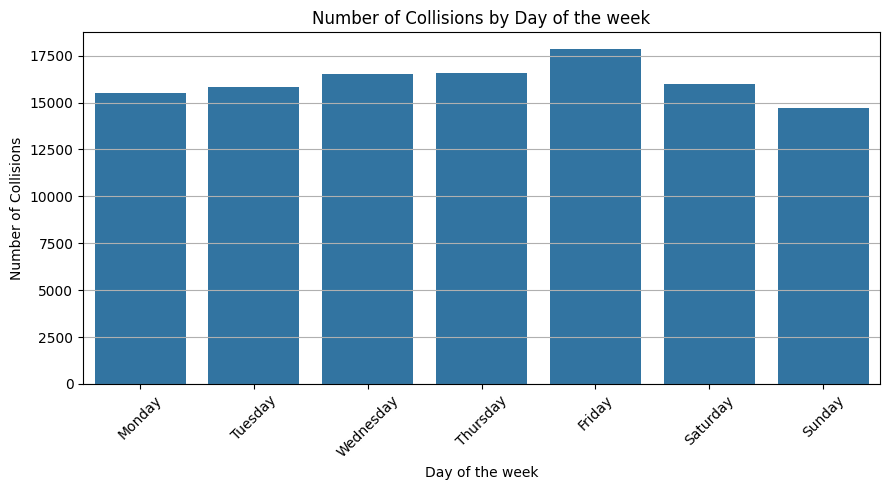

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='day_of_week', order=days_order)
plt.title('Number of Collisions by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Count the most common contributing factors from the first vehicle only

factor_counts = df['contributing_factor_vehicle_1'].value_counts()
print(factor_counts)

contributing_factor_vehicle_1
Driver Inattention/Distraction                           29341
Unspecified                                              26039
Failure to Yield Right-of-Way                             9096
Passing or Lane Usage Improper                            5461
Following Too Closely                                     5305
Passing Too Closely                                       5158
Backing Unsafely                                          4189
Traffic Control Disregarded                               3863
Unsafe Speed                                              3680
Other Vehicular                                           3085
Turning Improperly                                        3031
Driver Inexperience                                       2249
Alcohol Involvement                                       2107
Unsafe Lane Changing                                      1510
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     1177
Reaction to Uninvolved Ve

In [ ]:
df.groupby('borough')['collision_id'].count().sort_values(ascending=False)

,collision_id
borough,
BROOKLYN,39129
QUEENS,30873
BRONX,19756
MANHATTAN,18982
STATEN ISLAND,4225


Exploratory Analysis of



In [ ]:
(
df.groupby('contributing_factor_vehicle_1')[['number_of_persons_injured', 'number_of_persons_killed']]
  .mean()
  .sort_values(by='number_of_persons_injured', ascending=False).head(10)
)

,number_of_persons_injured,number_of_persons_killed
contributing_factor_vehicle_1,,
Listening/Using Headphones,1.500000,0.000000
Physical Disability,1.068182,0.022727
Cell Phone (hands-free),1.000000,0.000000
Lost Consciousness,0.948980,0.005102
Illnes,0.884211,0.005263
Traffic Control Device Improper/Non-Working,0.872727,0.000000
Traffic Control Disregarded,0.869531,0.006731
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,0.835034,0.007653
Failure to Yield Right-of-Way,0.802794,0.003960


In [ ]:
df.groupby('year')['collision_id'].count().sort_values(ascending=False)

,collision_id
year,
2022,53838
2021,47469
2023,11164
2024,399
2020,44
2025,35
2016,5
2018,5
2012,3


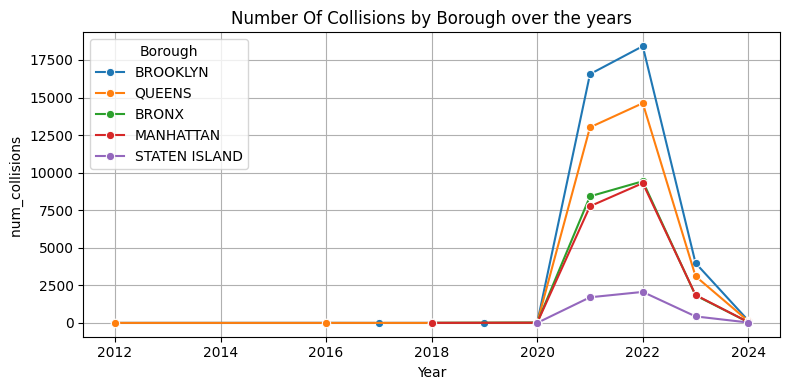

In [ ]:
import seaborn as sns
collision_by_borough_over_year =df.groupby(['year', 'borough']).size().reset_index(name='num_collisions')
plt.figure(figsize=(8,4))
sns.lineplot(data=collision_by_borough_over_year, x='year', y='num_collisions', hue='borough', marker='o')
plt.xlabel("Year")
plt.ylabel("num_collisions ")
plt.title("Number Of Collisions by Borough over the years")
plt.legend(title="Borough")
plt.grid(True)
plt.tight_layout()
#show the plt.plot
plt.show()

In [ ]:
df.groupby('zip_code')['collision_id'].count().sort_values(ascending=False)

,collision_id
zip_code,
11207.0,3054
11236.0,1929
11208.0,1885
11212.0,1803
11203.0,1703
...,...
10045.0,1
10048.0,1
10110.0,1


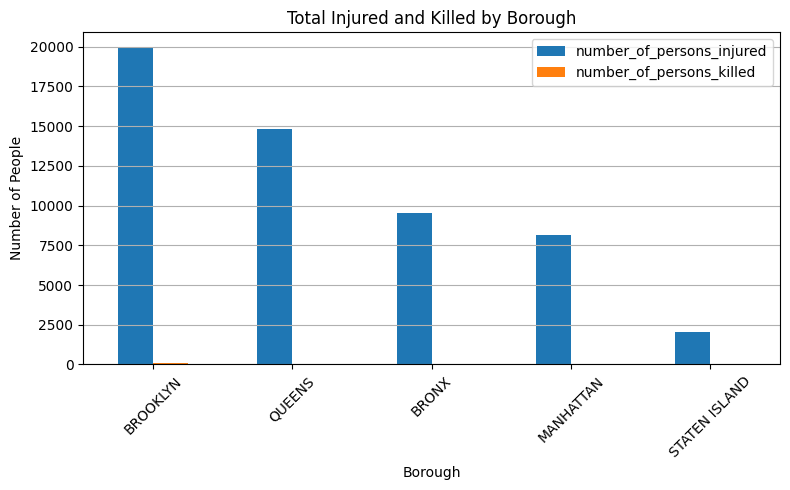

In [ ]:
 #Group by borough and calculate sum of injuries and deaths (borough)
summary_by_borough = df.groupby('borough')[['number_of_persons_injured', 'number_of_persons_killed']].sum().sort_values(by='number_of_persons_injured', ascending=False)
summary_by_borough
# Bar chart for injured and killed by borough
summary_by_borough.plot(kind='bar', figsize=(8,5))
plt.title('Total Injured and Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

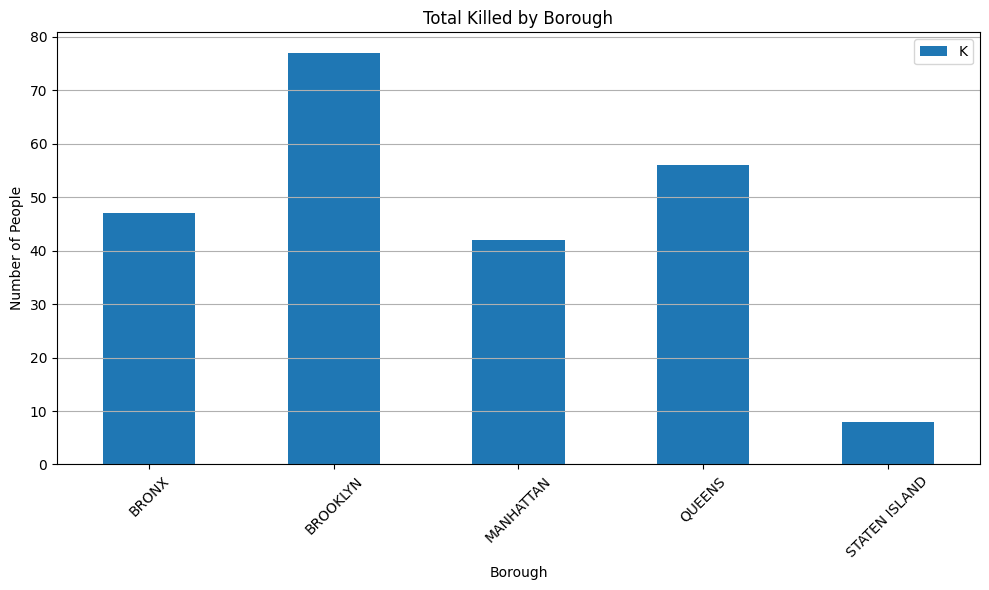

In [ ]:
#Group the data by borough and sum the number of injured and killed
summary_by_borough = df.groupby('borough')['number_of_persons_killed'].sum()
# Drop rows where borough is missing (just in case)
summary_by_borough = summary_by_borough.dropna()
# Create a grouped bar chart
summary_by_borough.plot(kind='bar', figsize=(10,6))
plt.title('Total Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend('Killed')
plt.grid(axis='y')
plt.tight_layout()
plt.show()